# Multiclass classification

* We just solved a binary classification problem in the previous challenge. 
* What about a **multiclass classification task**?

🎯 Exercise Objectives:
- Write a Neural Network designed for a multiclass classification problem
- Observe how this model could easily overfit... !

## (1) Create a `Blobs` dataset

📚 The **`make_blobs`** function from Sklearn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) allows you to generate: 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

💡 There is also the `random_state` argument that allows us to create the data deterministically, in order to reproduce the same data.


❓ Based on the documentation:

👽 Generate a ***blobs*** dataset with:
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

🔮 Select a `random_state` equal to 1.

📏 Print the shape and check that it corresponds to (1200, 8) for `X` and (1200,) for `y` ❓

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1200, centers=7, n_features=8, cluster_std=8, random_state=1)

❓ Use _matplotlib_ to draw a scatterplot of two (arbitrary) dimensions of this blobs dataset. Each dot should be colored with the category it belongs to. ❓

In [5]:
import pandas as pd

In [6]:
pd.DataFrame(X.T)

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,-9.983452,12.857893,11.289337,5.502440,-13.791838,7.270173,13.298225,-6.635157,5.166690,-0.576054,...,-11.436475,-5.665553,-7.934047,-8.304156,2.279133,-4.109192,11.382324,-26.577781,0.712856,-3.251060
1,-6.813585,-5.683921,12.724168,-6.358943,3.194847,3.803501,-10.705541,-0.031480,1.102255,-0.728600,...,-12.454722,0.222177,-7.029446,-5.278363,-1.038935,11.030287,1.034699,1.699297,21.720788,6.822170
2,-1.803034,-16.395622,-13.074863,0.271810,-4.009333,-2.248249,-0.103878,-18.392444,4.680029,-1.638089,...,-20.519490,-7.002108,-1.777695,-0.050142,-10.673777,-8.156955,10.539370,0.923308,1.071118,-13.155230
3,6.505192,-11.026596,-16.300011,12.366895,-8.466332,2.589499,1.474947,-16.446499,0.561714,14.385521,...,0.608832,-20.175747,6.181794,2.436611,-6.332244,2.142741,-7.583568,5.093832,-14.138434,-13.327856
4,9.449461,14.719776,-10.331541,-8.898767,-10.430255,-14.029697,-22.354902,5.398036,10.037742,5.293988,...,-14.493080,18.346327,-4.985989,0.306715,-3.726466,-8.843507,-6.035332,-12.928930,-8.069240,0.807216
5,11.453562,-6.152879,7.369573,-3.006504,2.237886,7.392523,11.418161,11.027834,-14.437500,-4.439066,...,-2.921258,7.413355,-4.324715,1.249222,-1.875063,-9.759293,9.243585,7.209062,-3.117596,-12.630679
6,2.507279,7.407416,7.112812,-8.959976,14.399150,14.507667,-10.169409,4.158051,-20.322201,-8.341217,...,-11.627043,-3.437818,0.646208,-2.146177,-13.918198,-4.782305,-9.114250,-21.772881,-22.010744,4.763270
7,17.188678,-3.596056,-1.862849,16.158835,9.520094,0.649043,16.229874,15.308504,2.629531,-6.223461,...,-13.793525,-6.088587,-6.210398,10.949455,1.598498,0.191628,-0.156599,6.774097,4.950671,1.730822


In [16]:
X[2]

array([ 11.28933721,  12.72416789, -13.07486267, -16.30001145,
       -10.33154146,   7.36957339,   7.11281172,  -1.86284857])

In [7]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,-9.983452,-6.813585,-1.803034,6.505192,9.449461,11.453562,2.507279,17.188678
1,12.857893,-5.683921,-16.395622,-11.026596,14.719776,-6.152879,7.407416,-3.596056
2,11.289337,12.724168,-13.074863,-16.300011,-10.331541,7.369573,7.112812,-1.862849
3,5.502440,-6.358943,0.271810,12.366895,-8.898767,-3.006504,-8.959976,16.158835
4,-13.791838,3.194847,-4.009333,-8.466332,-10.430255,2.237886,14.399150,9.520094
...,...,...,...,...,...,...,...,...
1195,-4.109192,11.030287,-8.156955,2.142741,-8.843507,-9.759293,-4.782305,0.191628
1196,11.382324,1.034699,10.539370,-7.583568,-6.035332,9.243585,-9.114250,-0.156599
1197,-26.577781,1.699297,0.923308,5.093832,-12.928930,7.209062,-21.772881,6.774097
1198,0.712856,21.720788,1.071118,-14.138434,-8.069240,-3.117596,-22.010744,4.950671


In [14]:
y

array([2, 2, 5, ..., 1, 3, 0])

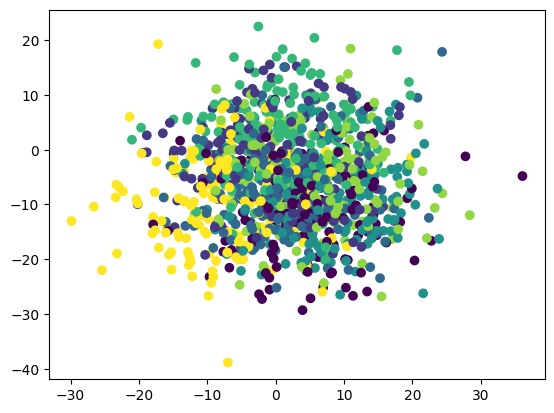

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X.T[1], X.T[2], c=y)
plt.show()

❓ Repeat the operation on other dimensions. You should see visually that the data points are not easily separable ❓

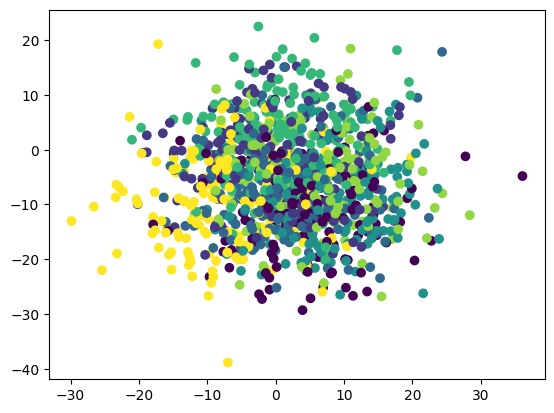

In [8]:
plt.scatter(X.T[1], X.T[2], c=y)
plt.show()

## (2) Encoding the target of a multi-class classification problem

👉 For the moment, the target `y` is a list of integers,  corresponding to the category of the input data. It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

🧑🏻‍🏫 However, **`for categorical problems in Tensorflow.Keras, the target/output should be encoded`** in the following way:

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

where:
* the number of rows is equal to the number of observations
* the number of columns is equal to the number of different categories

👉 Each column corresponds to a category. 

👉 Each row corresponds to a target, the 1 being the category the input data belongs to.

You can view a row as a vector of probabilities.

```
Example:
| Cat 0 | Cat 1 | Cat 2 | Cat 3 | Cat 4 | Cat 5 | Cat 6 |
|-------|-------|-------|-------|-------|-------|-------|
| 0     | 0     | 0     | 1     | 0     | 0     | 0     |

means that for this given row, there is a 100% chance that the row belongs to the Cat 3
```

--- 

💡 To transform `y` to categories, use **to_categorical** function from Tensorflow/Keras.


<detail>
    <summary><i> Is there an analogy between the _to_categorical_ of Tensorflow/Keras and the _OneHotEncoder_ of Scikit-Learn ?</i></summary>
    

Yes! *to_categorical* works a bit like the OneHotEncoder in Sklearn but instead of encoding a categorical feature, we are now encoding a categorical target.
    
</details>

---

❓ **Encoding the categorical target**:  Print `y`, then apply  *to_categorical* to *`y`* and store the *categorized version of y* into a variable called `y_cat`. ❓

In [9]:
print(y)

[2 2 5 ... 1 3 0]


In [10]:
from tensorflow.keras.utils import to_categorical

print("-"*50)
print("the original target looks like")
print(y)


print(f"it's shape is {y.shape}")

print("-"*50)
print("the encoded target looks like")
y_cat = to_categorical(y)
print(to_categorical(y))

print(f"it's shape is {y_cat.shape}")

2023-08-11 11:47:44.145917: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


--------------------------------------------------
the original target looks like
[2 2 5 ... 1 3 0]
it's shape is (1200,)
--------------------------------------------------
the encoded target looks like
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
it's shape is (1200, 7)


## (3) Neural Network for a Multiclass Classification Task

❓ **Hold-out method**: Split the dataset $X$ and $y_{cat}$ into a _train_ and _test_ set (size: 70/30%)

Remark: Please call the variables `X_train`, `X_test`, `y_train`, and `y_test` ❓

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3)

In Deep Learning, as in any Machine Learning algorithm, your numerical features should be scaled.

❓ **Scaling**: Fit a Sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the training set and transform both your train set and test set ❓

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
s_scaler = StandardScaler()

In [15]:
X_train = s_scaler.fit_transform(X_train)

In [16]:
X_test = s_scaler.transform(X_test)

❓ **Initializing a model**: Complete the following function to build/initialize a model that has: 
- a first layer with:
    - 50 neurons
    - the `relu` activation
    - the correct input dimension
- a output layer:
    - designed for a multiclass classification task 
    - which outputs probabilities of belonging to each class ❓

In [18]:
X_train.shape

(840, 8)

In [17]:
from tensorflow.keras import models, layers

In [19]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    ############################# 
    
    model = models.Sequential()
    model.add(layers.Dense(50, input_dim=8, activation='relu'))
    model.add(layers.Dense(7, activation='softmax'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='categorical_crossentropy', # different from binary_crossentropy because we have multiple classes
                  optimizer='adam', 
                  metrics=['accuracy']) 

    return model 


model = initialize_model()

2023-08-11 11:49:24.851882: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


❓  How many parameters (a.k.a. weights) are there in the model ❓

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 7)                 357       
                                                                 
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________


❓ **Fitting the model**: Fit your model on the train data with 50 epochs and plot the history ❓

In [21]:
model = initialize_model()

history = model.fit(X_train,y_train,
         epochs=50,
         batch_size=16,
         verbose=0)

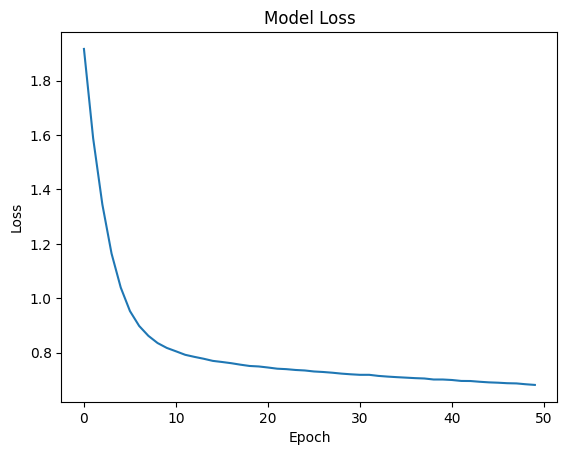

In [22]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.show()

plot_history(history)

❓ **Evaluation**:  Evaluate your model on the test set and print the accuracy ❓

In [23]:
res = model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 1ms/step - loss: 0.8455 - accuracy: 0.6972


In [24]:
res[1]

0.6972222328186035

❓ 🤔 Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give? Store this baseline score in the `accuracy_baseline` variable. ❓

In [26]:
accuracy_baseline = 1/7

🧪 **Test your code**

In [27]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-multiclass-classification/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_baseline.py::TestBaseline::test_accuracy PASSED                     [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/baseline.pickle

git commit -m 'Completed baseline step'

git push origin master



❗ 👀 Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stop it so soon ❓❗

❓ Let's re-initialize and re-run the model with 1000 epochs this time, and again plot the history. ❓

In [28]:
model = initialize_model()

history = model.fit(X_train,y_train,
         epochs=1000,
         batch_size=16,
         verbose=0)

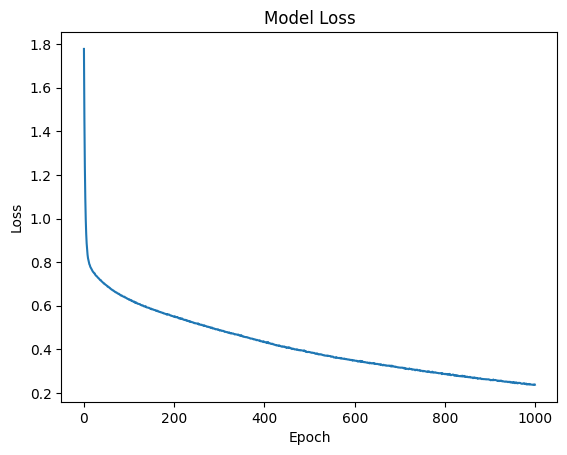

In [29]:
plot_history(history)

❓ **When training a model for a longer time...** ❓ 
- What can you say about the new loss? 
- Once again, evaluate your model on the test set and print the accuracy

In [30]:
res = model.evaluate(X_test, y_test)
res[1]

12/12 [==============================] - 0s 1ms/step - loss: 2.0235 - accuracy: 0.5972


0.5972222089767456

* 😁 The loss computed on the train set seems smaller with 1000 epochs than with 50 epochs. 
* 😟 But the accuracy on the test set is worse with 1000 epochs than with 50 epochs...

❓ What is this phenomenon called ❓

> YOUR ANSWER HERE

---

🤔 What should we do to prevent this from happening? 

<details>
    <summary><i>Possible options</i></summary>
    

⚠️ To prevent overfitting from happening in Neural Networks, we can - for example:
1. Choose a ***reasonable number of epochs*** to prevent the neural network from learning too much from noisy data points
2. Create what is called an ***Early Stopping*** criterion, i.e. a way to stop the training earlier than the numbers of epochs set in the _.fit()_ 📆 cf. ***Deep Learning > Optimizers, Loss, Fitting***

</details>    

---


❓ Let's visually check when the test loss starts increasing again in practice.  Run the following command and plot the history❓

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

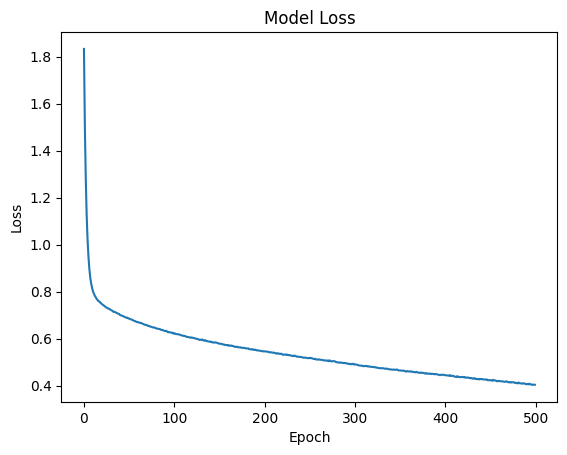

In [32]:
model = initialize_model()

# es = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train, 
                    y_train, 
                    validation_data = (X_test, y_test),
                    validation_split = 0.3,
                    epochs = 500, 
                    batch_size = 16,
#                     callbacks=[es],
                    verbose = 0)
plot_history(history)

😱 But wait... aren't we cheating if we use the test set? Yes we are. But again, be patient. In ***Deep Learning - Optimizers, Loss, Fitting***, we will use what we call a ***Validation Set*** to avoid this!

🧘🏻‍♀️ So for now, let's move on to the next questions!

❓ **Evaluating the network**: Plot the values of the loss and accuracy on the <span style="color:blue">train set</span> and on the <span style="color:orange">test set</span>. What can you comment on that ❓ 

In [33]:
history.history

{'loss': [1.8331139087677002,
  1.5057027339935303,
  1.2823406457901,
  1.1274983882904053,
  1.0207589864730835,
  0.9481569528579712,
  0.8966436982154846,
  0.8594404458999634,
  0.8342059254646301,
  0.8161804676055908,
  0.8011495471000671,
  0.7916529178619385,
  0.7829259037971497,
  0.776469886302948,
  0.7698184251785278,
  0.7648739814758301,
  0.7600992918014526,
  0.758164644241333,
  0.7536009550094604,
  0.7506651282310486,
  0.7467058897018433,
  0.7436128258705139,
  0.7413572072982788,
  0.7378864884376526,
  0.734801709651947,
  0.7324696779251099,
  0.7303257584571838,
  0.7284355759620667,
  0.7262553572654724,
  0.7243285179138184,
  0.7216464877128601,
  0.7199810743331909,
  0.7164864540100098,
  0.7136038541793823,
  0.7142351865768433,
  0.7122904658317566,
  0.7095947265625,
  0.7078006267547607,
  0.7063966989517212,
  0.7049338817596436,
  0.7006410360336304,
  0.699029266834259,
  0.6981555819511414,
  0.6964846849441528,
  0.6948297619819641,
  0.69276821

In [57]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

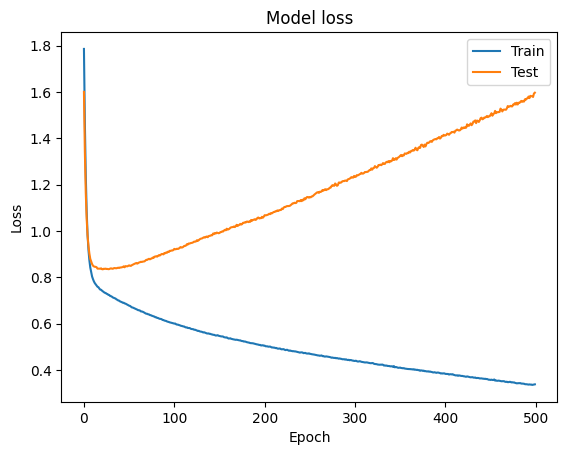

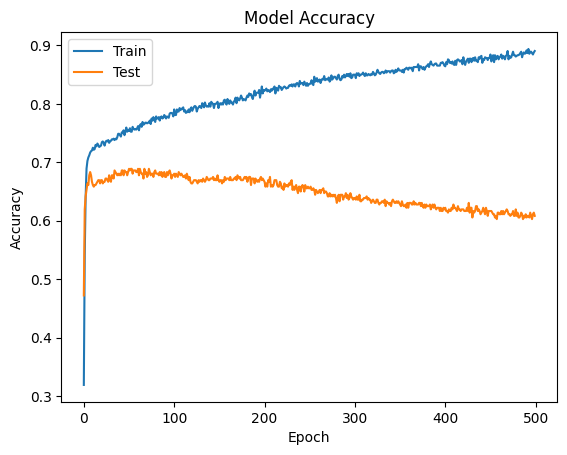

In [58]:
plot_loss_accuracy(history)

🤔 Why is our Deep Learning model overfitting so easily?

😳 Think about it, our neural network has to learn ~800 parameters for a simple classification task from a dataset of only 8 features! Besides, we only have ~800 data points in total to fit! The model could almost "learn" the exact class of every point in its train set. 

By contrast, a simple Logistic Regression would have required to learn only 9 parameters to capture the patterns of this blobs dataset! 

😏 Deep Learning is fancy, but can clearly be an overkill and unnecessary option for easy Machine Learning tasks!

⭐️ It will be extremely useful for:
- 📸 Image Processing
- 💹 Time Series
- 🗣 Natural Language Processing

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!